<a href="https://colab.research.google.com/github/KaGuYA31/Tugas_Machine-Learning/blob/main/Bimbingan_AnalisisSentimen_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ulasan Ruang Guru (1).csv to ulasan Ruang Guru (1) (1).csv


In [2]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import re
import fasttext
from sklearn.model_selection import train_test_split



In [36]:
# Load data dari file CSV
data = pd.read_csv('ulasan Ruang Guru (1).csv')

In [38]:
print(data.head)

<bound method NDFrame.head of               userName  score                   at  \
0                Super      2  2022-11-03 21:39:14   
1            Bagyo 123      2  2022-11-03 16:21:05   
2           Nabil Abin      1  2022-11-03 13:43:03   
3           Orang Bumi      3  2022-11-02 21:09:28   
4         useless time      5  2022-11-02 21:07:15   
...                ...    ...                  ...   
49995  Pengguna Google      5  2018-09-12 19:00:31   
49996  Pengguna Google      4  2018-09-12 18:41:01   
49997  Pengguna Google      5  2018-09-12 18:22:05   
49998  Pengguna Google      5  2018-09-12 18:13:27   
49999  Pengguna Google      5  2018-09-12 17:38:46   

                                                 content  
0      Ruang guru ini merupakan aplikasi yang cukup m...  
1                           Kenapa lama banget instalnya  
2      student advisor yang ngechat saya gbisa jaga s...  
3      bagus sih, penjelasannya juga mudah dipahami, ...  
4      Saya suka ruang gur

In [39]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(['userName', 'at'], axis=1)



In [40]:
# Menghapus tanda baca dan mengubah huruf kapital menjadi huruf kecil
data['content'] = data['content'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower().strip()))



In [41]:
# Menghapus kata-kata yang tidak relevan
stopwords = ['kata_penghubung_1', 'kata_penghubung_2', 'kata_umum_1', 'kata_umum_2']
data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [42]:
print(data.head)

<bound method NDFrame.head of        score                                            content
0          2  ruang guru ini merupakan aplikasi yang cukup m...
1          2                       kenapa lama banget instalnya
2          1  student advisor yang ngechat saya gbisa jaga s...
3          3  bagus sih penjelasannya juga mudah dipahami ta...
4          5  saya suka ruang guru karena pada pembahasan bi...
...      ...                                                ...
49995      5  wow hebat aplikasi ruang guru sangat membantu ...
49996      4  lumayan lah tapi materinya masih rada bingung ...
49997      5  terimakasih ruang guru tadi nya saya yg tidak ...
49998      5  saya suka denga aplikasi ini ruang guru dan ad...
49999      5  trima kasih banget ruang guru atas bimbingan b...

[50000 rows x 2 columns]>


In [43]:
# Mengecek nilai pada kolom score
print(data['score'].unique())

[2 1 3 5 4]


In [44]:
# Menghapus baris yang memiliki nilai yang tidak valid pada kolom score
data = data[data['score'].apply(lambda x: str(x).isdigit())]


In [45]:
# Mengubah tipe data kolom score menjadi integer
data['score'] = data['score'].astype(int)

In [46]:
# Menampilkan total data
print('Total Data:', len(data))

Total Data: 50000


In [47]:
# Membagi data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['score'], test_size=0.2, random_state=42)

In [48]:
# Menampilkan jumlah data latih dan data uji
print('Jumlah Data Latih:', len(X_train))
print('Jumlah Data Uji:', len(X_test))

Jumlah Data Latih: 40000
Jumlah Data Uji: 10000


In [49]:
# Membuat file teks yang berisi data latih
with open('train.txt', 'w') as f:
    for i in range(len(X_train)):
        f.write('__label__' + str(y_train.iloc[i]) + ' ' + X_train.iloc[i] + '\n')

In [50]:
# Melatih model FastText dengan file teks data latih
model = fasttext.train_supervised('train.txt')

In [51]:
# Membuat file teks yang berisi data uji
with open('test.txt', 'w') as f:
    for i in range(len(X_test)):
        f.write(X_test.iloc[i] + '\n')

In [52]:
# Menguji model dengan data uji
y_pred = []
with open('test.txt', 'r') as f:
    for line in f:
        y_pred.append(int(model.predict(line.strip())[0][0].replace('__label__', '')))

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
# Menghitung akurasi, presisi, recall, dan f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [55]:
# Menampilkan hasil evaluasi model
print('Akurasi:', accuracy)
print('Presisi:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Akurasi: 0.8355
Presisi: 0.4116115038647684
Recall: 0.3471314529074137
F1 Score: 0.34524744126201184


In [56]:
# Melabeli sentimen pada data berdasarkan score dan content
sentiment = []
for index, row in data.iterrows():
    if row['score'] >= 4:
        sentiment.append('positive')
    elif row['score'] <= 2:
        sentiment.append('negative')
    else:
        pred = model.predict(row['content'])
        if pred[0][0].replace('__label__', '') == '1':
            sentiment.append('negative')
        else:
            sentiment.append('neutral')



In [57]:
# Menambahkan kolom sentimen pada data
data['sentiment'] = sentiment



In [59]:
# Menampilkan 10 baris pertama dari data yang telah dilabeli
print(data.head)

<bound method NDFrame.head of        score                                            content sentiment
0          2  ruang guru ini merupakan aplikasi yang cukup m...  negative
1          2                       kenapa lama banget instalnya  negative
2          1  student advisor yang ngechat saya gbisa jaga s...  negative
3          3  bagus sih penjelasannya juga mudah dipahami ta...   neutral
4          5  saya suka ruang guru karena pada pembahasan bi...  positive
...      ...                                                ...       ...
49995      5  wow hebat aplikasi ruang guru sangat membantu ...  positive
49996      4  lumayan lah tapi materinya masih rada bingung ...  positive
49997      5  terimakasih ruang guru tadi nya saya yg tidak ...  positive
49998      5  saya suka denga aplikasi ini ruang guru dan ad...  positive
49999      5  trima kasih banget ruang guru atas bimbingan b...  positive

[50000 rows x 3 columns]>


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

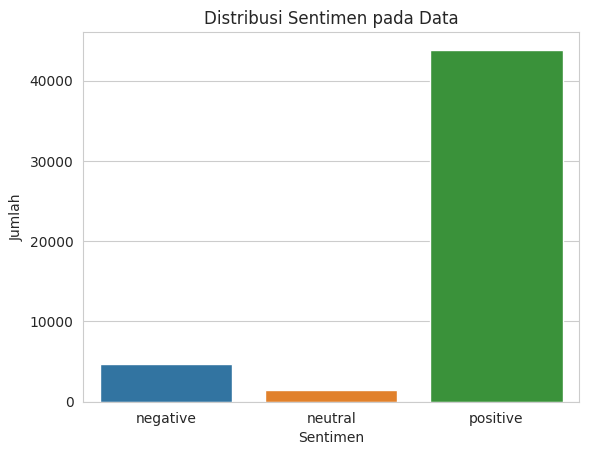

In [61]:
# Menampilkan grafik distribusi sentimen pada data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=data)
plt.title('Distribusi Sentimen pada Data')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [63]:
# Menampilkan tabel sentimen pada data
print(data[['content', 'score', 'sentiment']].head)

<bound method NDFrame.head of                                                  content  score sentiment
0      ruang guru ini merupakan aplikasi yang cukup m...      2  negative
1                           kenapa lama banget instalnya      2  negative
2      student advisor yang ngechat saya gbisa jaga s...      1  negative
3      bagus sih penjelasannya juga mudah dipahami ta...      3   neutral
4      saya suka ruang guru karena pada pembahasan bi...      5  positive
...                                                  ...    ...       ...
49995  wow hebat aplikasi ruang guru sangat membantu ...      5  positive
49996  lumayan lah tapi materinya masih rada bingung ...      4  positive
49997  terimakasih ruang guru tadi nya saya yg tidak ...      5  positive
49998  saya suka denga aplikasi ini ruang guru dan ad...      5  positive
49999  trima kasih banget ruang guru atas bimbingan b...      5  positive

[50000 rows x 3 columns]>
